In [1]:
from pyforest import *

In [5]:
tips = sns.load_dataset("tips")

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips_dummy = pd.get_dummies(tips)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.model_selection import train_test_split

In [14]:
x = tips_dummy.drop("tip", axis = 1)
y = tips_dummy.tip

In [12]:
import statsmodels.api as sts

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
newconstant = sts.add_constant(x)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
model = sts.OLS(ytrain, xtrain).fit()

In [21]:
pred = model.predict(xtest)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
print(r2_score(ytest, pred))
print(np.sqrt(mean_squared_error(ytest, pred)))

0.42638766150649265
1.0685770660241196


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     20.78
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           2.51e-22
Time:                        08:12:43   Log-Likelihood:                -276.24
No. Observations:                 195   AIC:                             570.5
Df Residuals:                     186   BIC:                             599.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_bill      0.0832      0.011      7.729      0.000       0.062       0.104
size            0.2588      0.100      2.581      0.011       0.061       0.457
sex_Male        0.1377      0.106      1.305      0.194      -0.070       0.346
sex_Female      0.2453      0.103      2.392      0.018       0.043       0.448
smoker_Yes      0.1342      0.105      1.281      0.202      -0.072       0.341
smoker_No       0.2487      0.105      2.364      0.019       0.041       0.456
day_Thur       -0.0292      0.365     -0.080      0.936      -0.749       0.691
day_Fri         0.0226      0.243      0.093      0.926      -0.457       0.502
day_Sat         0.1336      0.228      0.587      0.558      -0.315       0.582
day_Sun         0.2560      0.237      1.081      0.281      -0.211       0.723
time_Lunch      0.2852      0.300      0.951      0.343      -0.307       0.877
time_Dinner     0.0977      0.252      0.388      0.699      -0.399       0.595
==============================================================================
Omnibus:                       19.955   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.876
Skew:                           0.588   Prob(JB):                     1.97e-07
Kurtosis:                       4.554   Cond. No.                     4.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.96e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [30]:
# Apply Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [31]:
rfmodel = rf.fit(xtrain, ytrain).predict(xtest)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


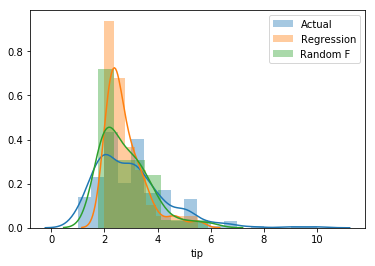

In [37]:
# Lets Plot the Values
sns.distplot(tips_dummy.tip, label = "Actual")
sns.distplot(pred, label = "Regression")
sns.distplot(rfmodel, label = "Random F")
plt.legend()
plt.show()

In [26]:
# Check Linear Regression Assumptions

In [38]:
# Residuals & R Square
residuals = model.resid
rsquare = model.rsquared
fitted = model.fittedvalues # Another name for Predicted Value

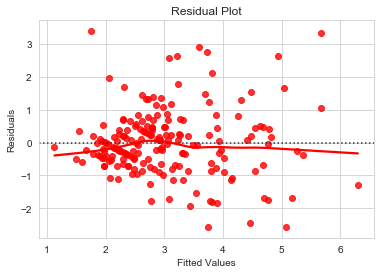

In [43]:
# Residual Plot
sns.set_style("whitegrid")
sns.residplot(fitted, residuals, lowess=True, color = "r")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

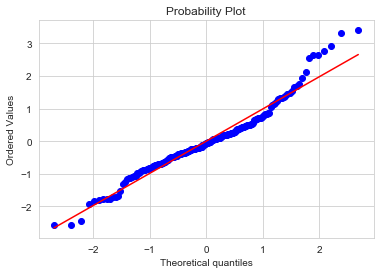

In [49]:
# Normality
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

#### Shapiro Wilk Test
1. The Shapiro-Wilk test for normality is used to examine a continuous variable.
2. The null hypothesis for this test is that the data are normally distributed

If the chosen alpha level is 0.05 and the p-value is less than 0.05, then the null hypothesis that the data are normally distributed is rejected. If the p-value is greater than 0.05, then the null hypothesis is not rejected.

In [50]:
from scipy.stats import shapiro

In [51]:
shapiro(residuals) # This shows that residuals are not normally distributed

(0.9592905044555664, 2.1147703591850586e-05)

#### # Durbin Watson Test - Test of Autocorrelation
1. Null Hypothesis - linear regression residuals are uncorrelated 
2. Alternate - Autocorrelation exists.

The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:
* 2 is no autocorrelation.
* 0 to <2 is positive autocorrelation (common in time series data).
>2 to 4 is negative autocorrelation (less common in time series data).
A rule of thumb is that test statistic values in the range of 1.5 to 2.5 are relatively normal. Values outside of this range could be cause for concern. 

In [52]:
import statsmodels.stats.api as dw

In [53]:
dw.durbin_watson(residuals) # Since it is greater than 02 but within 2.5 and hence Errors are Not Correlated

2.3362283469216254

#### Checking Heteroscedasticity

1. H0: The Residuals are not Heteroscedastic in Nature
2. H1: Residuals are Heteroscedastic in Nature

In [56]:
import statsmodels.stats.api as gq

In [69]:
gq.het_goldfeldquandt(residuals, xtrain) # Residuals are not Heteroscedastic in Nature

(0.8641051560637241, 0.7531015239303072, 'increasing')

#### Linearity - Rainbow Test
The Data should be Linear in Nature as in Residuals Linearity along with Predictor's Linearity is Preferred

The Null hypothesis is that the regression is correctly modelled as linear.

In [58]:
import statsmodels.api as lrain

In [61]:
lrain.stats.diagnostic.linear_rainbow(model) # Put LR Model in it.
# Data appears to be linear in nature as the Rainbow Test P Value is 0.558

(0.9707888249390191, 0.5580875042286176)

### VIF
The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.

#### Steps for Implementing VIF
1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
# For each X, calculate VIF and save in dataframe
tips_dummy["constant"] = 1
vif = [variance_inflation_factor(tips_dummy.values, i) for i in range(tips_dummy.shape[1])]

In [76]:
pd.DataFrame({"vif":vif[0:]}, index = tips_dummy.columns)

,vif
total_bill,2.389803
tip,1.887071
size,1.707111
sex_Male,inf
sex_Female,inf
smoker_Yes,inf
smoker_No,inf
day_Thur,inf
day_Fri,inf
day_Sat,inf


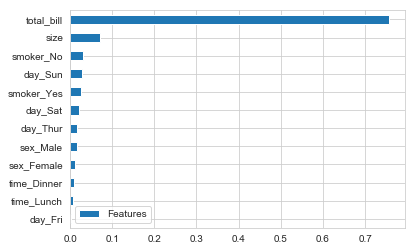

In [79]:
pd.DataFrame(rf.feature_importances_, index = xtest.columns, 
             columns = ["Features"]).sort_values(by = "Features").plot(kind = "barh")